In [5]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.preprocessing import *

#### LOAD DATASET

In [6]:
cal_housing = fetch_california_housing()
x, y = cal_housing.data, cal_housing.target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

#### NORMALIZE DATASET

In [7]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#### LINEAR REGRESSION:

In [8]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2: ", r2)
print("MSE: ", mse)

R2:  0.5957702326061664
MSE:  0.5305677824766752


#### KNN REGRSSOR

In [10]:
from sklearn.neighbors import KNeighborsRegressor

params = {"n_neighbors": [i for i in range(2, 22, 2)]}

regr = KNeighborsRegressor()
grid = GridSearchCV(regr, params, cv=3)

grid_result = grid.fit(x_train, y_train)

# Summary
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.678407 using {'n_neighbors': 12}
0.613041 (0.006141) with: {'n_neighbors': 2}
0.660862 (0.003878) with: {'n_neighbors': 4}
0.671660 (0.001240) with: {'n_neighbors': 6}
0.674159 (0.002851) with: {'n_neighbors': 8}
0.677370 (0.003107) with: {'n_neighbors': 10}
0.678407 (0.003387) with: {'n_neighbors': 12}
0.678211 (0.003188) with: {'n_neighbors': 14}
0.677799 (0.003857) with: {'n_neighbors': 16}
0.676416 (0.003873) with: {'n_neighbors': 18}
0.674795 (0.003925) with: {'n_neighbors': 20}


In [11]:
regr = KNeighborsRegressor(n_neighbors=12)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2: ", r2)
print("MSE: ", mse)

R2:  0.6870126694569266
MSE:  0.41080842457537875


#### RANDOM FOREST REGRESSOR

In [13]:
from sklearn.ensemble import RandomForestRegressor

params = {"n_estimators": [180, 220, 240],
         "max_depth": [8, 10, 12]}

regr = RandomForestRegressor()
grid = GridSearchCV(regr, params, cv=3, n_jobs=-1)

grid_result = grid.fit(x_train, y_train)

# Summary
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.786085 using {'max_depth': 12, 'n_estimators': 220}
0.748704 (0.008435) with: {'max_depth': 8, 'n_estimators': 180}
0.747957 (0.008834) with: {'max_depth': 8, 'n_estimators': 220}
0.749040 (0.009624) with: {'max_depth': 8, 'n_estimators': 240}
0.774338 (0.007270) with: {'max_depth': 10, 'n_estimators': 180}
0.774052 (0.008698) with: {'max_depth': 10, 'n_estimators': 220}
0.774132 (0.008035) with: {'max_depth': 10, 'n_estimators': 240}
0.785048 (0.007458) with: {'max_depth': 12, 'n_estimators': 180}
0.786085 (0.007197) with: {'max_depth': 12, 'n_estimators': 220}
0.785432 (0.006156) with: {'max_depth': 12, 'n_estimators': 240}


In [14]:
regr = RandomForestRegressor(n_estimators=220, max_depth=12)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2: ", r2)
print("MSE: ", mse)

R2:  0.7936052595999104
MSE:  0.27090137481694804


#### GRADIENT BOOSTING REGRESSOR

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

params = {"n_estimators": [180, 220, 240],
         "max_depth": [6, 7, 8],
         "learning_rate": [0.06, 0.07]}

regr = GradientBoostingRegressor()
grid = GridSearchCV(regr, params, cv=3, n_jobs=-1)

grid_result = grid.fit(x_train, y_train)

# Summary
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.827245 using {'learning_rate': 0.06, 'max_depth': 7, 'n_estimators': 240}
0.821935 (0.003738) with: {'learning_rate': 0.06, 'max_depth': 6, 'n_estimators': 180}
0.824809 (0.003597) with: {'learning_rate': 0.06, 'max_depth': 6, 'n_estimators': 220}
0.825953 (0.003593) with: {'learning_rate': 0.06, 'max_depth': 6, 'n_estimators': 240}
0.825096 (0.002314) with: {'learning_rate': 0.06, 'max_depth': 7, 'n_estimators': 180}
0.826515 (0.002462) with: {'learning_rate': 0.06, 'max_depth': 7, 'n_estimators': 220}
0.827245 (0.002191) with: {'learning_rate': 0.06, 'max_depth': 7, 'n_estimators': 240}
0.822520 (0.003168) with: {'learning_rate': 0.06, 'max_depth': 8, 'n_estimators': 180}
0.823797 (0.003568) with: {'learning_rate': 0.06, 'max_depth': 8, 'n_estimators': 220}
0.824027 (0.003315) with: {'learning_rate': 0.06, 'max_depth': 8, 'n_estimators': 240}
0.823278 (0.003156) with: {'learning_rate': 0.07, 'max_depth': 6, 'n_estimators': 180}
0.824295 (0.003439) with: {'learning_rate': 0.07

In [16]:
regr = GradientBoostingRegressor(n_estimators=240, max_depth=7, learning_rate=0.06)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2: ", r2)
print("MSE: ", mse)

R2:  0.8377355987163165
MSE:  0.2129785347552378


#### SVM REGRESSOR:

In [17]:
from sklearn.svm import SVR

params = {"kernel": ["linear", "rbf", "sigmoid"]}

regr = SVR()
grid = GridSearchCV(regr, params, cv=3, n_jobs=-1)

grid_result = grid.fit(x_train, y_train)

# Summary
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.727710 using {'kernel': 'rbf'}
-1.537577 (3.003287) with: {'kernel': 'linear'}
0.727710 (0.004329) with: {'kernel': 'rbf'}
-3709.164984 (105.770897) with: {'kernel': 'sigmoid'}


In [18]:
regr = SVR(kernel="rbf")
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2: ", r2)
print("MSE: ", mse)

R2:  0.7336772286885802
MSE:  0.3495593189703779


#### BEST MODEL:

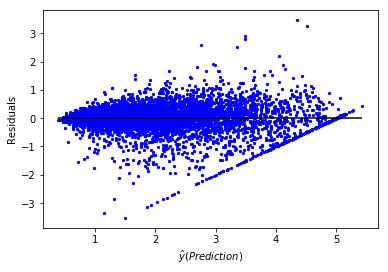

In [19]:
regr = GradientBoostingRegressor(n_estimators=240, max_depth=7, learning_rate=0.06)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

min_val = min(y_pred)
max_val = max(y_pred)

plt.scatter(y_pred, y_pred - y_test, color="blue", s=5)
plt.hlines(y = 0, xmin =min_val, xmax=max_val)
plt.xlabel("$\hat{y} (Prediction)$")
plt.ylabel("Residuals")
plt.show()